# Week4授業前課題1 アヤメを分類しよう

# 課題の目的

- 教師あり学習（分類問題）の概観を知る
- scikit-laernを使い分類を行えるようにする
- 手法の簡単な比較をする

# 全体像

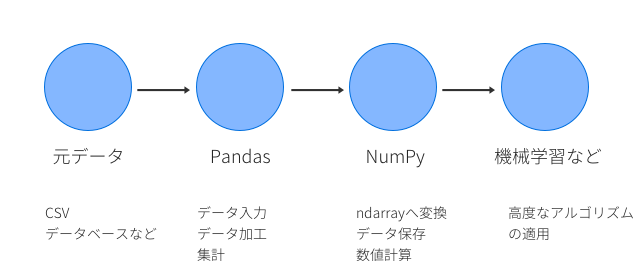

[画像元：DeepAge 人工知能の今と一歩先を発信するメディア](https://deepage.net/features/pandas-numpy.html#pandas%E3%81%AF%E6%89%B1%E3%81%86%E3%83%87%E3%83%BC%E3%82%BF%E3%81%8C%E5%B9%85%E5%BA%83%E3%81%84)

# アヤメの分類

Week3で使用したirisデータセットを使い、分類問題を解く練習を行う。

irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータ。

Iris setosa - Wikipedia
Iris virgicolor - Wikipedia
Iris virginica - Wikipedia

4種類の特徴量（説明変数）からアヤメの種類を推測する問題（分類問題）を設定する。

＜今回使う手法の一覧＞

scikit-laernを使い以下の手法で学習と推定を行う。（ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に確認する）

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト


# 分類問題の流れ

まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。

# 【課題1】練習のために特徴量とカテゴリを選択

選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

- virgicolorとvirginica
- sepal_lengthとpetal_length

In [556]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#help(sklearn) # ライブラリ情報を表示
#dir(sklearn) # モジュールの一覧を表示 （importエラーが発生した時やモジュール名を簡単に確認したいときに便利）
#dir(sklearn.datasets)
#dir(sklearn.datasets.load_iris)

In [557]:
# データをインポートする
from sklearn.datasets import load_iris

# データを読み込む
iris = load_iris()
#iris

# pandasのデータフレーム形式に変換
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target # targetの列を追加

# データを出力する（target= 0:"setosa", 1: "versicolor", 2:"virginica"）
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [558]:
# 列名を取得する（復習）
column_list = df.columns

#column_list # index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target'], dtype='object')
# type(column_list) # pandas.core.indexes.base.index
# column_list[0]
# type(column_list[0]) # str

In [559]:
# versinica(target: 1)とversicolor(target:2)を抜き出す
# sepal_lengthとpetal_lengthを抜き出す

new_df = df[df["target"] != 0].loc[:, ["sepal length (cm)", "petal length (cm)", "target"]]
#new_df

In [560]:
new_df.head()

,sepal length (cm),petal length (cm),target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [561]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 3 columns):
sepal length (cm)    100 non-null float64
petal length (cm)    100 non-null float64
target               100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [562]:
new_df.describe()

,sepal length (cm),petal length (cm),target
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


# 【問題2】データの分析

抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示する。

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


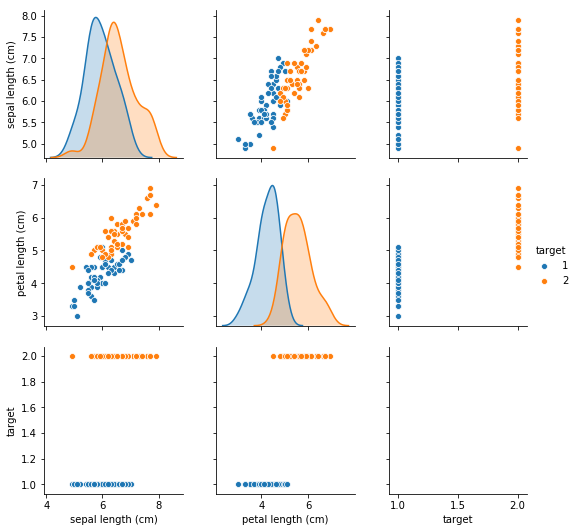

In [563]:
# 散布図を表示する(target = 1:"versica", 2:"versicolor")
sns.pairplot(new_df, hue = "target")

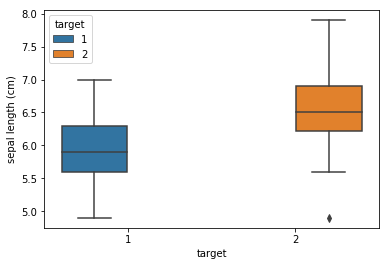

In [564]:
# sepal_lengthの箱ひげ図を表示する(target = 1:"versica", 2:"versicolor")
sns.boxplot(x = "target", y = "sepal length (cm)", hue = "target", data=new_df)

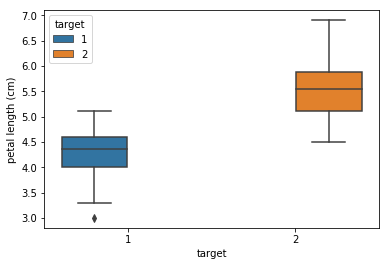

In [565]:
# petal_lengthの箱ひげ図を表示する(target = 1:"versica", 2:"versicolor")
sns.boxplot(x = "target", y = "petal length (cm)", hue = "target", data=new_df)

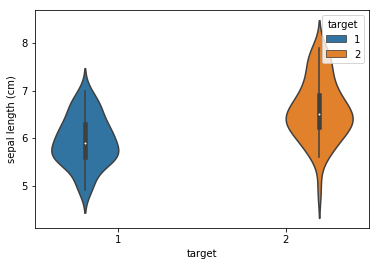

In [566]:
# sepal_lengthのバイオリン図を表示する(target = 1:"versica", 2:"versicolor")
sns.violinplot(x = "target", y = "sepal length (cm)", hue = "target", data=new_df)

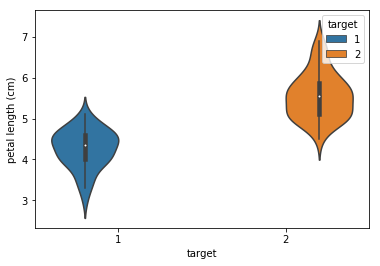

In [567]:
# petal_lengthのバイオリン図を表示する(target = 1:"versica", 2:"versicolor")
sns.violinplot(x = "target", y = "petal length (cm)", hue = "target", data=new_df)

# 【問題3】前処理・学習用データと検証用データの分割


- 前処理の一貫として、学習用（train）データと検証用（validation）データの分割を行う。

- 今回は学習用データ75%、検証用データ25%として分割する。

- scikit-learnのtrain_test_splitが利用すること。

  [sklearn.model_selection.train_test_split — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

＜注意点＞

- データの分析まではPandasのDataFrame型を使用したが、scikit-learnはNumPyのndarray型を想定して作られている。

- この段階でndarrayへの変換を行い、**特徴量（説明変数）をX**、**正解（目的変数）をy**というndarrayに格納する。

＜データを分割する理由＞

- 分類問題の目的は未知のデータを正しく分類すること。

- その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておく。

- 学習に使用していないデータで推定を行い、そこから求めた指標値によって検証する。

- 学習に使うデータを学習用データ、検証に使うデータが検証用データで、一般的に7対3から8対2程度の割合とする。

In [568]:
# DataFrame形式からndarray型に変換し、説明変数Xに格納する

X = new_df[["sepal length (cm)", "petal length (cm)"]].values # 説明変数の配列（"sepal lengh", "petal length"）

# type(X) # データ型が"numpy.ndarray"であることを確認した
# X.ndim # 次元数２
# X.shape # 形状（100, 2）
# X.size # サイズ 200

In [569]:
# DataFrame形式からndarray型に変換し、目的変数yに格納する
#　のちにKNeighbor_Classifierに１次元配列を渡すことが求められたので、この時点で１次元配列に変換した

y = np.ravel(new_df[["target"]].values)

# type(y) # データ型が"numpy.ndarray"であることを確認した
# y.ndim # 次元数２
# y.shape # 形状（100, 1）
# y.size # サイズ 100

In [570]:
# モジュールをインポートする
from sklearn.model_selection import train_test_split

# 学習用データ、検証用データを作成する(データを読み込む度に前提条件が変わらないようにため、random_state = 1とする)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=1)

In [571]:
# 分割されたデータの中身を確認しておく
print("X_trainの次元数：{}".format(X_train.ndim))
print("X_trainの形状：{}".format(X_train.shape))
print("X_trainのサイズ：{}".format(X_train.size))

print("")

print("X_testの次元数：{}".format(X_test.ndim))
print("X_testの形状：{}".format(X_test.shape))
print("X_testのサイズ：{}".format(X_test.size))

print("")

print("サイズ２００のデータセットが75%：25%の割合で分割され、学習用データと検証用データが作成されていることを確認できた。")

X_trainの次元数：2
X_trainの形状：(75, 2)
X_trainのサイズ：150

X_testの次元数：2
X_testの形状：(25, 2)
X_testのサイズ：50

サイズ２００のデータセットが75%：25%の割合で分割され、学習用データと検証用データが作成されていることを確認できた。


In [572]:
# 分割されたデータの中身を確認しておく
print("y_trainの次元数：{}".format(y_train.ndim))
print("y_trainの形状：{}".format(y_train.shape))
print("y_trainのサイズ：{}".format(y_train.size))

print("")

print("y_testの次元数：{}".format(y_test.ndim))
print("y_testの形状：{}".format(y_test.shape))
print("y_testのサイズ：{}".format(y_test.size))

print("")

print("サイズ２００のデータセットが75%：25%の割合で分割され、学習用データと検証用データが作成されていることを確認できた。")

y_trainの次元数：1
y_trainの形状：(75,)
y_trainのサイズ：75

y_testの次元数：1
y_testの形状：(25,)
y_testのサイズ：25

サイズ２００のデータセットが75%：25%の割合で分割され、学習用データと検証用データが作成されていることを確認できた。


# 【問題3】前処理・標準化

- 分類精度をあげるための加工を行う。

- 手法ごとに適切な方法は異なるが、ここでは一例として標準化を行う。

- scikit-learnに用意されている標準化を行うライブラリを用いて標準化する。

  [sklearn.preprocessing.StandardScaler — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

＜注意点＞

1. 標準化は学習用のデータでfitを行い、学習用、検証用双方のデータにtransformを行う。
2. 検証用データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけない。

In [573]:
# モジュールをインポートする
#dir(sklearn) # モジュールの一覧からPreprocessingを発見
# dir(sklearn.preprocessing) # モジュールの一覧からStandardScalerを発見
from sklearn.preprocessing import StandardScaler

# データを標準化する
data = X_train # 標準化の対象は学習用データ

# インスタンスを生成 
scaler = StandardScaler() # StandardScaler(copy=True, with_mean=True, with_std=True)
# dir(scaler) # scalerに含まれるmethod、attributesを確認

# StandardScaler()に学習用データをfitさせる（＝ 標準化に用いる平均値、標準偏差を算出する）
scaler.fit(data)

# 標準化に用いる平均、分散（つまり、標準偏差）の値
print("sepal_length, petal_lengthの標準化に用いる平均値: {}".format(scaler.mean_))
print("sepal_length, petal_lengthの標準化に用いる分散: {}".format(scaler.var_))

# 学習用データ、検証用データを標準化（.transform）する
X_train = scaler.transform(X_train) # 学習用データを標準化する
X_test = scaler.transform(X_test) # 検証用データを標準化する

sepal_length, petal_lengthの標準化に用いる平均値: [6.28266667 4.892     ]
sepal_length, petal_lengthの標準化に用いる分散: [0.41316622 0.69380267]


# 【問題4】学習と推定

- 最近傍法（k-nearest neighbors, k-nn）で学習を行う。
- scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行う。（入力値は学習用データ）

  [sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)


- 学習が終わった後、検証用データをpredictメソッドに入力し、推定を行う。

- パラメータが複数あるが、今はそれらの理解を重視せず、最も基本的な要素として、n_neighborsの数があるため、これは複数試すこと。

- デフォルトの5、および1と3を最低限行う（5の場合を5-nn、3の場合を3-nnのように呼び出す）

In [574]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighborsをデフォルト（= 5）として、インスタンスを生成する
neigh_5 = KNeighborsClassifier()
#type(neigh) # sklearn.neighbors.classification.KNeighborsClassifier

# 標準化した学習用データをfitさせる
neigh_5.fit(X_train, y_train)

# 検証用データを用いて、目的変数の分類を予測する
y_predict_nn_5 = neigh_5.predict(X_test)
y_predict_nn_5.reshape(len(y_predict_nn_5),1)

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1]])

In [575]:
# n_neighborsを1として、インスタンスを生成する
neigh_1 = KNeighborsClassifier(n_neighbors = 1)
#type(neigh) # sklearn.neighbors.classification.KNeighborsClassifier

# 標準化した学習用データをfitさせる
neigh_1.fit(X_train, y_train) 

# 検証用データを用いて、目的変数の分類を予測する
y_predict_nn_1 = neigh_1.predict(X_test)
y_predict_nn_1.reshape(len(y_predict_nn_1),1)

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1]])

In [576]:
# n_neighborsを3として、インスタンスを生成する
neigh_3 = KNeighborsClassifier(n_neighbors = 3)
#type(neigh) # sklearn.neighbors.classification.KNeighborsClassifier

# 標準化した学習用データをfitさせる
neigh_3.fit(X_train, y_train) 

# 検証用データを用いて、目的変数の分類を予測する
y_predict_nn_3 = neigh_3.predict(X_test)
y_predict_nn_3.reshape(len(y_predict_nn_3),1)

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1]])

In [577]:
# n_neighborsを7として、インスタンスを生成する
neigh_7 = KNeighborsClassifier(n_neighbors = 7)
#type(neigh) # sklearn.neighbors.classification.KNeighborsClassifier

# 標準化した学習用データをfitさせる
neigh_7.fit(X_train, y_train) 

# 検証用データを用いて、目的変数の分類を予測する
y_predict_nn_7 = neigh_7.predict(X_test)
y_predict_nn_7.reshape(len(y_predict_nn_7),1)

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1]])

In [578]:
# n_neighborsを9として、インスタンスを生成する
neigh_9 = KNeighborsClassifier(n_neighbors = 9)
#type(neigh) # sklearn.neighbors.classification.KNeighborsClassifier

# 標準化した学習用データをfitさせる
neigh_9.fit(X_train, y_train) 

# 検証用データを用いて、目的変数の分類を予測する
y_predict_nn_9 = neigh_9.predict(X_test)
y_predict_nn_9.reshape(len(y_predict_nn_9),1)

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1]])

In [579]:
# n_neighborsを11として、インスタンスを生成する
neigh_11 = KNeighborsClassifier(n_neighbors = 11)
#type(neigh) # sklearn.neighbors.classification.KNeighborsClassifier

# 標準化した学習用データをfitさせる
neigh_11.fit(X_train, y_train) 

# 検証用データを用いて、目的変数の分類を予測する
y_predict_nn_11 = neigh_11.predict(X_test)
y_predict_nn_11.reshape(len(y_predict_nn_11),1)

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1]])

In [580]:
#  目的変数の予測値と正解ラベルを比較し、正解率を求める
#data_y = [y_test, y_predict_nn_1, y_predict_nn_3, y_predict_nn_5, y_predict_nn_7, y_predict_nn_9, y_predict_nn_11]
#columns = ["y_test", "y_predict_nn_1","y_predict_nn_3","y_predict_nn_5","y_predict_nn_7", "y_predict_nn_9", "y_predict_nn_11"]
columns = ["y_predict_nn_1","y_predict_nn_3","y_predict_nn_5","y_predict_nn_7", "y_predict_nn_9", "y_predict_nn_11"]
data_y = [y_predict_nn_1, y_predict_nn_3, y_predict_nn_5, y_predict_nn_7, y_predict_nn_9, y_predict_nn_11]

y_predict_nn_1.reshape(25,1)
df_predict = pd.DataFrame(data = y_test, columns = ["y_test"])
#df_predict
#y_test.shape
df_predict


,y_test
0,2
1,2
2,1
3,2
4,2
5,1
6,1
7,2
8,2
9,2


# 【問題5】評価

検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価する。

- 2値分類を評価するための指標値には accuracy、precision、recall、f値 がある。
- scikit-learnから値を計算し、それぞれの意味について簡単に調査してマークダウンでまとめる。

 [sklearn.metrics.accuracy_score — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

 [sklearn.metrics.precision_score — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

 [sklearn.metrics.recall_score — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

 [sklearn.metrics.f1_score — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)


precision、recall、f値を計算する背景にはTrue Positive、True Negative、False Positive、False Negativeがある。

- 混合行列（この4種類を計算し表示）をscikit-learnを使い表示する。

[sklearn.metrics.confusion_matrix — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [581]:
#dir(sklearn)
#dir(sklearn.metrics)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 比較対象となる予測値と正解レベルを用意する
y_true = y_test
y_pred = y_predict_nn_5

print("accuracy_score : {}".format(accuracy_score(y_true, y_pred)))
print("precision_score : {}".format(precision_score(y_true, y_pred)))
print("recall_score : {}".format(recall_score(y_true, y_pred)))
print("f1_score : {}".format(f1_score(y_true, y_pred)))

accuracy_score : 0.92
precision_score : 0.9
recall_score : 0.9
f1_score : 0.9


In [582]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_nn_5))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        15

   micro avg       0.92      0.92      0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [583]:
# 混同行列を表示する
from sklearn.metrics import confusion_matrix

print("アヤメの分類に関する混同行列")
print("")
print(confusion_matrix(y_true, y_pred))

アヤメの分類に関する混同行列

[[ 9  1]
 [ 1 14]]


###  accuracy、precision、recall、f値

#### ＜用語の説明＞

下図の通り、予測値と正解の組み合わせにより、真陽性(True Positive)、偽陽性(False Positive)、偽陰性(False Negative)、真陰性(True Negative)に分類される。

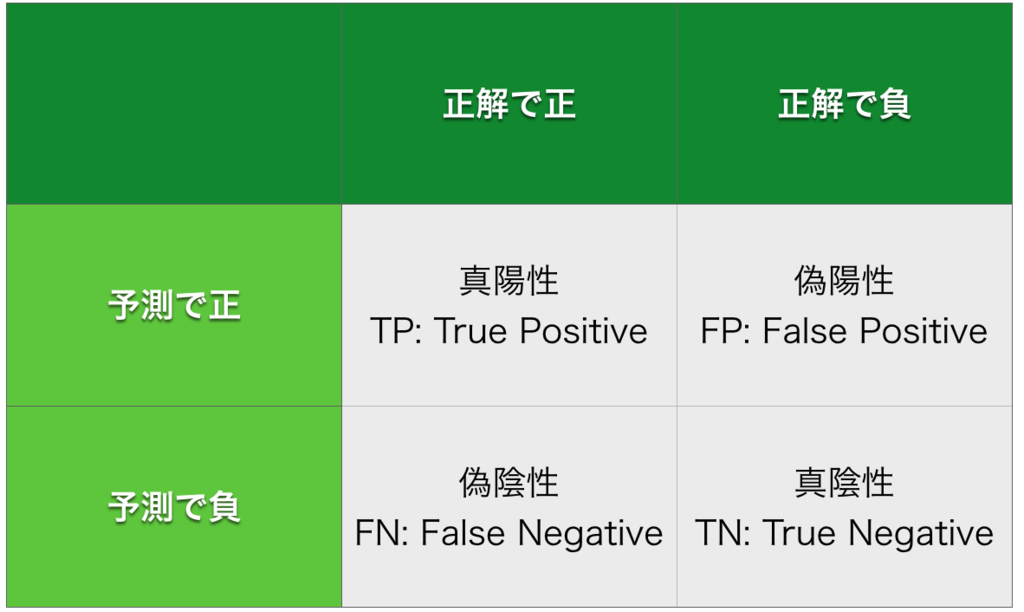

#### ＜指標の説明＞
- Accuracy（正解率）
  - 予測値全体と実際の正解ラベルがどの程度一致するか判断する指標。
  - 正解ラベルの値が、正が1%で負が99%のような場合、すべてのデータを不正解と予測するデータがある場合、99%の精度を持つモデルと評価されてしまうため、accuracyだけでモデルの精度を判断しないよう留意が必要。


- Precision（適合率）
  - tp /（tp + fp)で算出される。(tpは真陽性の数、fpは偽陽性の数)
  - 適合率は1と推定したもののうち、実際に1であるものの割合
  - 偽陽性を低く抑えることを目的とする場合には適合率が高いモデルを採用する。
  - 犯罪の検挙を例にすると、一般市民を冤罪で逮捕してしまう率を低く抑えることができる。


- Recall（再現率）
  - tp /（tp + fn）で算出される。(tp：真陽性の数、fn：偽陰性の数）
  - 再現率は実際に1であるもののうち、1と推定されたものの割合 


- f値（F-measure）
  - 適合率と再現率がトレードオフの関係にあることを踏まえて調和平均をとった指標。
  - $2 * Recall * Precision / (Recall + Precision) $

# 【問題6】可視化

評価の一貫として可視化を行う。

- 今回の場合2次元の特徴量で分類を行ったため、散布図で可視化が可能。
- どう分割するかという決定領域を描く関数をを利用して可視化する。

In [584]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

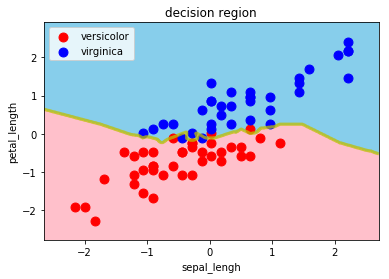

In [585]:
# 可視化
decision_region(X_train, y_train, neigh_5, xlabel = "sepal_lengh", ylabel="petal_length")

# 【問題7】他の手法の学習

- 以下の全ての手法について学習・推定・評価・可視化を行い、指標値を１つの表にまとめる。

- その表と決定領域を利用して結果を簡単に考察し、どの手法がどの指標値が良かったかや、どういった決定領域になっていたかを述べること。
  - 最近傍法
  - ロジスティック回帰
  - SVM
  - 決定木
  - ランダムフォレスト

公式ドキュメントへのリンクは以下。（本来はそれぞれパラメータをチューニングするべきだが、まずはデフォルトで実行する）

 [sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

[sklearn.linear_model.LogisticRegression — scikit-learn 0.20.2](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[sklearn.svm.SVC — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

[sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [586]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_KN = KNeighborsClassifier()

# フィッティング
clf_KN.fit(X_train, y_train)

# テストデータを用いた予測、スコアの算出
y_pred_KN = clf_KN.predict(X_test)
accu_KN = accuracy_score(y_true, y_pred_KN)
prec_KN = precision_score(y_true, y_pred_KN)
rec_KN = recall_score(y_true, y_pred_KN)
f1_KN = f1_score(y_true, y_pred_KN)

# 出力
print(y_pred_KN)
print("accuracy_score : {}".format(accu_KN))
print("precision_score : {}".format(prec_KN))
print("recall_score : {}".format(rec_KN))
print("f1_score : {}".format(f1_KN))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1]
accuracy_score : 0.92
precision_score : 0.9
recall_score : 0.9
f1_score : 0.9


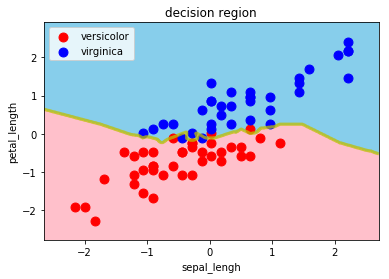

In [587]:
# 可視化
decision_region(X_train, y_train, clf_KN , xlabel = "sepal_lengh", ylabel="petal_length")

In [588]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_LR = LogisticRegression(random_state = 0)

# フィッティング
clf_LR.fit(X_train, y_train)

# テストデータを用いた予測、スコアの算出
y_pred_LR = clf_LR.predict(X_test)
accu_LR = accuracy_score(y_true, y_pred_LR)
prec_LR = precision_score(y_true, y_pred_LR)
rec_LR = recall_score(y_true, y_pred_LR)
f1_LR = f1_score(y_true, y_pred_LR)

# 出力
print(y_pred_KN)
print("accuracy_score : {}".format(accu_LR))
print("precision_score : {}".format(prec_LR))
print("recall_score : {}".format(rec_LR))
print("f1_score : {}".format(f1_LR))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1]
accuracy_score : 0.88
precision_score : 0.8181818181818182
recall_score : 0.9
f1_score : 0.8571428571428572


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


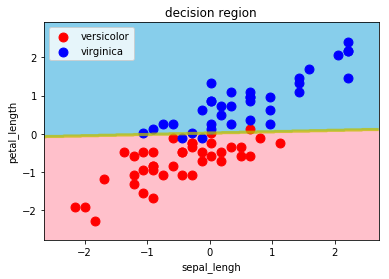

In [589]:
# 可視化
decision_region(X_train, y_train, clf_LR, xlabel = "sepal_lengh", ylabel="petal_length")

In [590]:
# SupportVectorMachine

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_svm = SVC()

# フィッティング
clf_svm.fit(X_train, y_train)

# テストデータを用いた予測
# テストデータを用いた予測、スコアの算出
y_pred_svm = clf_svm.predict(X_test)
accu_svm = accuracy_score(y_true, y_pred_svm)
prec_svm = precision_score(y_true, y_pred_svm)
rec_svm = recall_score(y_true, y_pred_svm)
f1_svm = f1_score(y_true, y_pred_svm)

# 出力
print(y_pred_SVM)
print("accuracy_score : {}".format(accu_svm))
print("precision_score : {}".format(prec_svm))
print("recall_score : {}".format(rec_svm))
print("f1_score : {}".format(f1_svm))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1]
accuracy_score : 0.92
precision_score : 0.9
recall_score : 0.9
f1_score : 0.9


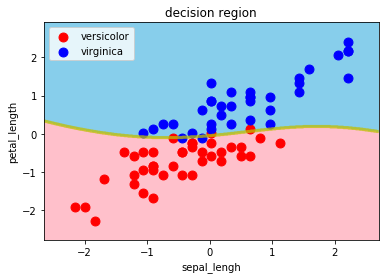

In [591]:
# 可視化
decision_region(X_train, y_train, clf_svm, xlabel = "sepal_lengh", ylabel="petal_length")

In [592]:
# 決定木(Decision Tree Classifier)

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_DT = DecisionTreeClassifier(random_state = 0)

# フィッティング
clf_DT.fit(X_train, y_train)

# テストデータを用いた予測
# テストデータを用いた予測、スコアの算出
y_pred_DT = clf_DT.predict(X_test)
accu_DT = accuracy_score(y_true, y_pred_DT)
prec_DT = precision_score(y_true, y_pred_DT)
rec_DT = recall_score(y_true, y_pred_DT)
f1_DT = f1_score(y_true, y_pred_DT)

# 出力
print(y_pred_KN)
print("accuracy_score : {}".format(accu_DT))
print("precision_score : {}".format(prec_DT))
print("recall_score : {}".format(rec_DT))
print("f1_score : {}".format(f1_DT))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1]
accuracy_score : 0.88
precision_score : 0.8181818181818182
recall_score : 0.9
f1_score : 0.8571428571428572


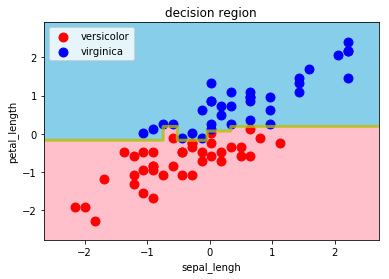

In [593]:
# 可視化
decision_region(X_train, y_train, clf_DT, xlabel = "sepal_lengh", ylabel="petal_length")

In [594]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_RF = RandomForestClassifier()

# フィッティング
clf_RF.fit(X_train, y_train)

# テストデータを用いた予測
# テストデータを用いた予測、スコアの算出
y_pred_RF = clf_RF.predict(X_test)
accu_RF = accuracy_score(y_true, y_pred_RF)
prec_RF = precision_score(y_true, y_pred_RF)
rec_RF = recall_score(y_true, y_pred_RF)
f1_RF = f1_score(y_true, y_pred_RF)

# 出力
print(y_pred_RF)
print("accuracy_score : {}".format(accu_RF))
print("precision_score : {}".format(prec_RF))
print("recall_score : {}".format(rec_RF))
print("f1_score : {}".format(f1_RF))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 1 2 2 1]
accuracy_score : 0.88
precision_score : 0.8181818181818182
recall_score : 0.9
f1_score : 0.8571428571428572


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


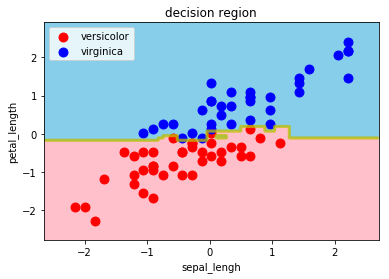

In [595]:
# 可視化
decision_region(X_train, y_train, clf_RF, xlabel = "sepal_lengh", ylabel="petal_length")

In [638]:
# スコアリングを表にまとめる

# 行、列の名称を作成
index = np.array(["accuracy", "precision_score", "recall_score", "f1_score"])
columns = np.array(["KNeighborsClassifier", "LogisticRegression","SVM", "DecisionTreeClassifier", "RandomForestClassifier"])

# 各手法によるスコアリング結果をNumpy配列で整理する
accuracy = np.array([accu_KN, accu_LR, accu_SVM, accu_DT, accu_RF])
precision_score = np.array([prec_KN, prec_LR, prec_SVM, prec_DT, prec_RF])
recall_score = np.array([rec_KN, rec_LR, rec_SVM, rec_DT, rec_RF])
f1_score = np.array([f1_KN, f1_LR, f1_SVM, f1_DT, f1_RF])

score = np.array([accuracy, precision_score, recall_score, f1_score])

# データフレームにまとめて表示する
score_matrix = pd.DataFrame(score, index = index, columns = columns)
score_matrix

,KNeighborsClassifier,LogisticRegression,SVM,DecisionTreeClassifier,RandomForestClassifier
accuracy,0.92,0.880000,0.92,0.880000,0.880000
precision_score,0.90,0.818182,0.90,0.818182,0.818182
recall_score,0.90,0.900000,0.90,0.900000,0.900000
f1_score,0.90,0.857143,0.90,0.857143,0.857143


### 各手法のスコアリング、分類方法に対する考察

1. 今回の評価では、KNeigbourClassifier、およびSVMによる分類精度が高かった。


2. 散布図を見ると、以下の通り、分類の境界線が線形、非線形に分かれていることが確認される。

  - 線形：ロジスティック回帰
  - 非線形：最近傍法、SVM、決定木、ランダムフォレスト


3. 分類の境界線が非線形の手法についても、以下の特徴が確認された。

  - 最近傍法、SVM：境界線が滑らかにつながっている。
  - 決定木、ランダムフォレスト：縦横の分割線で構成される（かなり厳密に境界線を定義しており、データ次第では過学習になるか？）

# 【問題8】（アドバンス課題）各パラメータの意味

- 各手法のパラメータはデフォルトとしたが、実務上ではデフォルトは必ずしも良い設定ではない。

- それぞれの意味を調査した上で複数の設定を試し、その結果を報告する。

### KNeighborsClassifierのパラメータについて

以下、公式ドキュメントよりKNeighborsClassifierのパラメータに関する記述を引用する。

---

1. *n_neighbors : int, optional (default = 5)*
  - kneighborsクエリにデフォルトで使用する近傍の数。


2. *weights : str or callable, optional (default = ‘uniform’)*
  - weight function used in prediction. Possible values:
    - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
     - [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.


3. *algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional*
  - Algorithm used to compute the nearest neighbors:
    - ‘ball_tree’ will use BallTree
    - ‘kd_tree’ will use KDTree
    - ‘brute’ will use a brute-force search.
    - ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.


4. *leaf_size : int, optional (default = 30)*
  - Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.


5. *p : integer, optional (default = 2)*
  - Power parameter for the Minkowski metric.
  - When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.


6. *metric : string or callable, default ‘minkowski’*
  - the distance metric to use for the tree.
  - The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.


7. *metric_params : dict, optional (default = None)*
  - Additional keyword arguments for the metric function.


8. *n_jobs : int or None, optional (default=None)*
  - The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.


In [597]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_KN_new = KNeighborsClassifier(weights = "distance", algorithm = "ball_tree")

# フィッティング
clf_KN_new.fit(X_train, y_train)

# テストデータを用いた予測、スコアの算出
y_pred_KN_new = clf_KN_new.predict(X_test)
accu_KN_new = accuracy_score(y_true, y_pred_KN_new)
prec_KN_new = precision_score(y_true, y_pred_KN_new)
rec_KN_new = recall_score(y_true, y_pred_KN_new)
f1_KN_new = f1_score(y_true, y_pred_KN_new)

# 出力

print(y_pred_KN_new)
print("accuracy_score : {}".format(accu_KN_new))
print("precision_score : {}".format(prec_KN_new))
print("recall_score : {}".format(rec_KN_new))
print("f1_score : {}".format(f1_KN_new))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 1 2 2 1]
accuracy_score : 0.88
precision_score : 0.8181818181818182
recall_score : 0.9
f1_score : 0.8571428571428572


# 【問題9】（アドバンス課題）標準化の有無の比較

- 前処理として標準化を行ったが、これを行わなかった場合どのような結果が得られるか。

- 各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行う。（機械学習の前処理としての標準化の意味を含めること）

In [598]:
# 標準化する前のデータを読み込み
X_non_std = new_df[["sepal length (cm)", "petal length (cm)"]].values
y = np.ravel(new_df[["target"]].values)

In [626]:
# モジュールをインポートする
from sklearn.model_selection import train_test_split

# 学習用データ、検証用データを作成する(データを読み込む度に前提条件が変わらないようにため、random_state = 1とする)

X_train_non_std, X_test_non_std, y_train_non_std, y_test_non_std = train_test_split(X_non_std, y, test_size= 0.25, random_state=1)

In [627]:
#  テストデータを再作成する
y_true_non_std = y_test_non_std

In [633]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_KN_non_std = KNeighborsClassifier()

# フィッティング
clf_KN_non_std.fit(X_train_non_std, y_train_non_std)

# テストデータを用いた予測、スコアの算出
y_pred_KN_non_std = clf_KN_non_std.predict(X_test_non_std)
accu_KN_non_std = accuracy_score(y_true_non_std, y_pred_KN_non_std)
prec_KN_non_std = precision_score(y_true_non_std, y_pred_KN_non_std)
rec_KN_non_std = recall_score(y_true_non_std, y_pred_KN_non_std)
f1_KN_non_std = f1_score(y_true_non_std, y_pred_KN_non_std)

# 出力
print(y_pred_KN_non_std)
print("accuracy_score : {}".format(accu_KN_non_std))
print("precision_score : {}".format(prec_KN_non_std))
print("recall_score : {}".format(rec_KN_non_std))
print("f1_score : {}".format(f1_KN_non_std))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1]
accuracy_score : 0.92
precision_score : 0.9
recall_score : 0.9
f1_score : 0.9


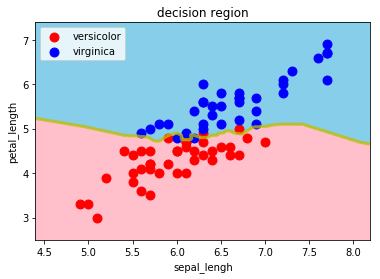

In [634]:
# 可視化
decision_region(X_train_non_std, y_train_non_std, clf_KN_non_std, xlabel = "sepal_lengh", ylabel="petal_length")

# 正規化に対する考察

- 評価指標の値、および境界線の位置に変化は見られなかった。

- 標準化することで説明変数が無次元化されると共に、値の縮尺が揃う（標準正規分布に従う）ので視覚的な比較がしやすくなるメリットがある。

# 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法

- 3種類全てを使った多値分類を行う。


- 学習と推定、評価を行い、最も精度の高い手法を探す。


- ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは意識せず動作させることができる。


- precision、recall、f値はライブラリのパラメータをデフォルトから変更する必要がある。


- マイクロ平均やマクロ平均という考え方を使うので、これについて調査して説明をまとめること。


- 決定領域を可視化する場合は前述の関数を適切に書き換える必要がある。

# マイクロ平均、マクロ平均について

- マクロ平均（macro average）：全クラスの結果の平均。つまり、適合率、再現率、F1値をそれぞれのクラスごとに求めて平均する。


- マイクロ平均(micro average)：混同行列全体でTP, FP, FNを集計し、それに基いて二値分類と同様に評価指標を算出する。

In [602]:
# versinica(target: 1)とversicolor(target:2)を抜き出す

df_multi = df.loc[:, ["sepal length (cm)", "petal length (cm)", "target"]]
df_multi.info() # ３種類全てが含まれている

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
sepal length (cm)    150 non-null float64
petal length (cm)    150 non-null float64
target               150 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


In [603]:
X_multi = df_multi[["sepal length (cm)", "petal length (cm)"]].values # 説明変数の配列（"sepal lengh", "petal length"）
y_multi = np.ravel(df_multi[["target"]].values)

In [604]:
# 学習用データ、検証用データを作成する(データを読み込む度に前提条件が変わらないようにため、random_state = 1とする)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size= 0.25, random_state=1)

In [605]:
# 標準化する
from sklearn.preprocessing import StandardScaler

# データを標準化する
data_multi = X_train_multi # 標準化の対象は学習用データ

# インスタンスを生成 
scaler_multi = StandardScaler() # StandardScaler(copy=True, with_mean=True, with_std=True)
# dir(scaler) # scalerに含まれるmethod、attributesを確認

# StandardScaler()に学習用データをfitさせる（＝ 標準化に用いる平均値、標準偏差を算出する）
scaler_multi.fit(data_multi)

# 標準化に用いる平均、分散（つまり、標準偏差）の値
print("sepal_length, petal_lengthの標準化に用いる平均値: {}".format(scaler.mean_))
print("sepal_length, petal_lengthの標準化に用いる分散: {}".format(scaler.var_))

# 学習用データ、検証用データを標準化（.transform）する
X_train = scaler_multi.transform(X_train_multi) # 学習用データを標準化する
X_test = scaler_multi.transform(X_test_multi) # 検証用データを標準化する

sepal_length, petal_lengthの標準化に用いる平均値: [6.28266667 4.892     ]
sepal_length, petal_lengthの標準化に用いる分散: [0.41316622 0.69380267]


In [606]:
# テストデータを再作成
y_true = y_test_multi
y_true # 38個

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

### 学習・推計

In [615]:
# 最近傍法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

# インスタンスの生成
clf_KN_multi = KNeighborsClassifier()

# フィッティング
clf_KN_multi.fit(X_train_multi, y_train_multi)

# テストデータを用いた予測、スコアの算出
y_pred_KN_multi = clf_KN_multi.predict(X_test_multi)
accu_KN_multi = accuracy_score(y_true, y_pred_KN_multi)
prec_KN_multi = precision_score(y_true, y_pred_KN_multi, average="micro")
rec_KN_multi = recall_score(y_true, y_pred_KN_multi, average="micro")
f1_KN_multi = f1_score(y_true, y_pred_KN_multi, average="micro")

# 出力
print(y_pred_KN_multi)
print("accuracy_score : {}".format(accu_KN_multi))
print("precision_score : {}".format(prec_KN))
print("recall_score : {}".format(rec_KN))
print("f1_score : {}".format(f1_KN))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 2 2 1 2 1 2 2 0 1
 0]
accuracy_score : 0.9473684210526315
precision_score : 0.9
recall_score : 0.9
f1_score : 0.9


In [617]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_LR_multi = LogisticRegression(random_state = 0)

# フィッティング
clf_LR_multi.fit(X_train_multi, y_train_multi)

# テストデータを用いた予測、スコアの算出
y_pred_LR_multi = clf_LR_multi.predict(X_test_multi)
accu_LR_multi = accuracy_score(y_true, y_pred_LR_multi)
prec_LR_multi = precision_score(y_true, y_pred_LR_multi, average="micro")
rec_LR_multi = recall_score(y_true, y_pred_LR_multi, average="micro")
f1_LR_multi = f1_score(y_true, y_pred_LR_multi, average="micro")

# 出力
print(y_pred_KN)
print("accuracy_score : {}".format(accu_LR_multi))
print("precision_score : {}".format(prec_LR_multi))
print("recall_score : {}".format(rec_LR_multi))
print("f1_score : {}".format(f1_LR_multi))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1]
accuracy_score : 0.7631578947368421
precision_score : 0.7631578947368421
recall_score : 0.7631578947368421
f1_score : 0.7631578947368421


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [619]:
# SupportVectorMachine

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_svm_multi = SVC()

# フィッティング
clf_svm_multi.fit(X_train_multi, y_train_multi)

# テストデータを用いた予測
# テストデータを用いた予測、スコアの算出
y_pred_svm_multi = clf_svm_multi.predict(X_test_multi)
accu_svm_multi = accuracy_score(y_true, y_pred_svm_multi)
prec_svm_multi = precision_score(y_true, y_pred_svm_multi, average="micro")
rec_svm_multi = recall_score(y_true, y_pred_svm_multi, average="micro")
f1_svm_multi = f1_score(y_true, y_pred_svm_multi, average="micro")

# 出力
print(y_pred_SVM)
print("accuracy_score : {}".format(accu_svm_multi))
print("precision_score : {}".format(prec_svm_multi))
print("recall_score : {}".format(rec_svm_multi))
print("f1_score : {}".format(f1_svm_multi))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1]
accuracy_score : 0.9736842105263158
precision_score : 0.9736842105263158
recall_score : 0.9736842105263158
f1_score : 0.9736842105263158


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [621]:
# 決定木(Decision Tree Classifier)

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_DT_multi = DecisionTreeClassifier(random_state = 0)

# フィッティング
clf_DT_multi.fit(X_train_multi, y_train_multi)

# テストデータを用いた予測
# テストデータを用いた予測、スコアの算出
y_pred_DT_multi = clf_DT.predict(X_test_multi)
accu_DT_multi = accuracy_score(y_true, y_pred_DT_multi)
prec_DT_multi = precision_score(y_true, y_pred_DT_multi, average="micro")
rec_DT_multi = recall_score(y_true, y_pred_DT_multi, average="micro")
f1_DT_multi = f1_score(y_true, y_pred_DT_multi, average="micro")

# 出力
print(y_pred_KN)
print("accuracy_score : {}".format(accu_DT_multi))
print("precision_score : {}".format(prec_DT_multi))
print("recall_score : {}".format(rec_DT_multi))
print("f1_score : {}".format(f1_DT_multi))

[2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1]
accuracy_score : 0.23684210526315788
precision_score : 0.23684210526315788
recall_score : 0.23684210526315788
f1_score : 0.23684210526315788


In [636]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# インスタンスの生成
clf_RF_multi = RandomForestClassifier()

# フィッティング
clf_RF_multi.fit(X_train_multi, y_train_multi)

# テストデータを用いた予測
# テストデータを用いた予測、スコアの算出
y_pred_RF_multi = clf_RF_multi.predict(X_test_multi)
accu_RF_multi = accuracy_score(y_true, y_pred_RF_multi)
prec_RF_multi = precision_score(y_true, y_pred_RF_multi, average="micro")
rec_RF_multi = recall_score(y_true, y_pred_RF_multi, average="micro")
f1_RF_multi = f1_score(y_true, y_pred_RF_multi, average="micro")

# 出力
print(y_pred_RF_multi)
print("accuracy_score : {}".format(accu_RF_multi))
print("precision_score : {}".format(prec_RF_multi))
print("recall_score : {}".format(rec_RF_multi))
print("f1_score : {}".format(f1_RF_multi))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]
accuracy_score : 1.0
precision_score : 1.0
recall_score : 1.0
f1_score : 1.0


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [637]:
# スコアリングを表にまとめる

# 行、列の名称を作成
index = np.array(["accuracy", "precision_score", "recall_score", "f1_score"])
columns = np.array(["KNeighborsClassifier", "LogisticRegression","SVM", "DecisionTreeClassifier", "RandomForestClassifier"])

# 各手法によるスコアリング結果をNumpy配列で整理する
accuracy_multi = np.array([accu_KN_multi, accu_LR_multi, accu_svm_multi, accu_DT_multi, accu_RF_multi])
precision_score_multi = np.array([prec_KN_multi, prec_LR_multi, prec_svm_multi, prec_DT_multi, prec_RF_multi])
recall_score_multi = np.array([rec_KN_multi, rec_LR_multi, rec_svm_multi, rec_DT_multi, rec_RF_multi])
f1_score_multi = np.array([f1_KN_multi, f1_LR_multi, f1_svm_multi, f1_DT_multi, f1_RF_multi])

score_multi = np.array([accuracy_multi, precision_score_multi, recall_score_multi, f1_score_multi])

# データフレームにまとめて表示する
score_matrix_multi = pd.DataFrame(score_multi, index = index, columns = columns)
score_matrix_multi

,KNeighborsClassifier,LogisticRegression,SVM,DecisionTreeClassifier,RandomForestClassifier
accuracy,0.947368,0.763158,0.973684,0.236842,1.0
precision_score,0.947368,0.763158,0.973684,0.236842,1.0
recall_score,0.947368,0.763158,0.973684,0.236842,1.0
f1_score,0.947368,0.763158,0.973684,0.236842,1.0
